In [1]:
%cd ~/NetBeansProjects/ExpLosion/
from notebooks.common_imports import *
from gui.output_utils import *
from gui.user_code import pretty_names

/Volumes/LocalDataHD/m/mm/mmb28/NetBeansProjects/ExpLosion


wins [12, 27, 16, 31, 17, 32, 14, 29, 13, 28, 18, 33, 15, 30]
Corpus has 7000 values
Accuracy has 7000 values
algo has 7000 values
Composer has 7000 values
folds has 7000 values
0.2184633027522936


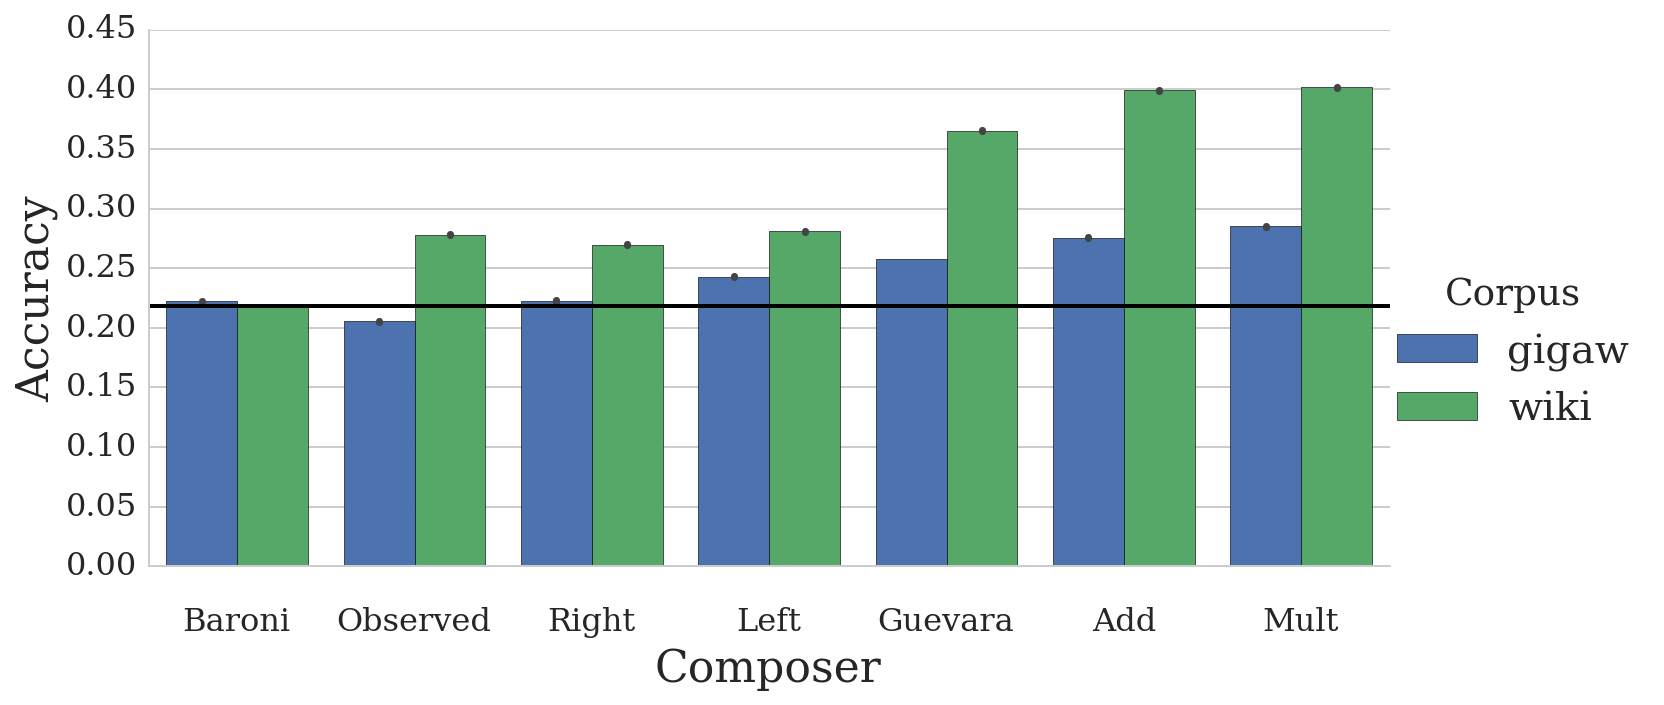

In [2]:
d1 = {
    'document_features_ev': 'AN+NN',
    'document_features_tr': 'J+N+AN+NN',
    'labelled': 'amazon_grouped-tagged',
    'expansions__allow_overlap': 0,
    'expansions__decode_handler': 'SignifiedOnlyFeatureHandler',
    'expansions__entries_of_id': None,
    'expansions__k': 3,
    'expansions__neighbour_strategy': 'linear',
    'expansions__noise': 0.0,
    'expansions__use_random_neighbours': 0,
    'expansions__use_similarity': 0,
    'expansions__vectors__algorithm': 'count_windows',
    'expansions__vectors__dimensionality': 100,
    'expansions__vectors__rep': 0,
    'expansions__vectors__unlabelled__in': ['gigaw', 'wiki'],
    'expansions__vectors__unlabelled_percentage': 100
     }

def _get(d):
    return [x.id for x in Experiment.objects.filter(**d).\
            order_by('expansions__vectors__algorithm', 'expansions__vectors__composer')]

wins = _get(d1)
print('wins', wins)
fields_to_include = {'algo':'expansions__vectors__algorithm', 
                     'Composer':'expansions__vectors__composer',
                    'Corpus':'expansions__vectors__unlabelled'}
df = dataframe_from_exp_ids(wins, fields_to_include)

g = sns.factorplot(x='Composer', y='Accuracy', data=df, kind='bar', hue='Corpus',
                  x_order=sort_df_by(df, 'Composer'), aspect=2);
# g.set_xticklabels(rotation=60);
plt.axhline(random_vect_baseline(), color='black');
print(random_vect_baseline())
g.savefig('plot-windows-funky-composers.pdf', format='pdf', dpi=300, bbox_inches='tight', pad_inches=0.1)

In [3]:
def f1(x):
    return '%1.2f' % x

ddf = df.drop('folds', axis=1).groupby('Composer').agg([np.mean, np.std])
ddf.columns = ddf.columns.droplevel(0)
ddf = ddf.sort('mean')
# print(ddf.to_latex())
ddf.columns, ddf.index

(Index(['mean', 'std'], dtype='object'),
 Index(['Baroni', 'Observed', 'Right', 'Left', 'Guevara', 'Add', 'Mult'], dtype='object', name='Composer'))

In [4]:
ddf['Accuracy'] = ddf['mean'].map(f1) + "$\pm$" + ddf['std'].map(f1)
ddf = ddf.drop(['mean', 'std'], axis=1)#.reset_index()#.sort()
print(ddf.to_latex(float_format=f1, escape=False))

# ddf = df.drop('folds', axis=1).groupby('Composer').agg('mean').reset_index() # no need to drop unwanted columns
# print(ddf.to_latex(float_format=f1))

ddf

\begin{tabular}{ll}
\toprule
{} &       Accuracy \\
\midrule
Composer &                \\
Baroni   &  0.22$\pm$0.00 \\
Observed &  0.24$\pm$0.04 \\
Right    &  0.25$\pm$0.02 \\
Left     &  0.26$\pm$0.02 \\
Guevara  &  0.31$\pm$0.05 \\
Add      &  0.34$\pm$0.06 \\
Mult     &  0.34$\pm$0.06 \\
\bottomrule
\end{tabular}



,Accuracy
Composer,
Baroni,0.22$\pm$0.00
Observed,0.24$\pm$0.04
Right,0.25$\pm$0.02
Left,0.26$\pm$0.02
Guevara,0.31$\pm$0.05
Add,0.34$\pm$0.06
Mult,0.34$\pm$0.06
